# **Titanic Survival Exploration - project**
(udacity machine learning engineer nanodegree - optional project)

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew.
In this introductory project, we explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive. To complete this project, we implement several conditional predictions.

In [12]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data) # or to get just a glimpse add the .head method to full_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Various features about each passenger

**Survived:**     Outcome of survival (0 = No; 1 = Yes)
<br>**Pclass:**   Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
<br>**Name:**     Name of passenger
<br>**Sex:**      Sex of the passenger
<br>**Age:**      Age of the passenger (Some entries contain NaN)
<br>**SibSp:**    Number of siblings and spouses of the passenger aboard
<br>**Parch:**    Number of parents and children of the passenger aboard
<br>**Ticket:**   Ticket number of the passenger
<br>**Fare:**     Fare paid by the passenger
<br>**Cabin:**    Cabin number of the passenger (Some entries contain NaN)
<br>**Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

## 1. Creation of an Outcomes variable

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the Survived feature from this dataset and store it as its own separate variable outcomes. We will use these outcomes as our prediction targets.

In [13]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the Survived feature removed from the DataFrame.
<br> Data (the passenger data) and outcomes (the outcomes of survival) are now paired. In other words, for any passenger data.loc[i], they have the survival outcome outcomes[i].<br>

## 2. Creation of an accuracy_score function.

<br> To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how accurate our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct.
<br> Thus, we'll create an **accuracy_score** function.

In [14]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print(accuracy_score(outcomes[:5], predictions)) # again we show the first 5 passengers cases with slicing

Predictions have an accuracy of 60.00%.


In this case, the predictions have an accuracy of **60.00%**.

## **3. Making predictions**

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.
<br>The predictions_0 function below will always predict that a passenger did not survive.

In [15]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

**Q1:** How accurate would a prediction be that none of the passengers survived?

In [16]:
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 61.62%.


In this case, the predictions have an accuracy of **61.62%**.

**1. Plot the survival outcomes of passengers based on their sex.**

Let's take a look at whether the feature Sex has any indication of survival rates among passengers using the survival_stats function. This function is defined in the visualiz.py Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.

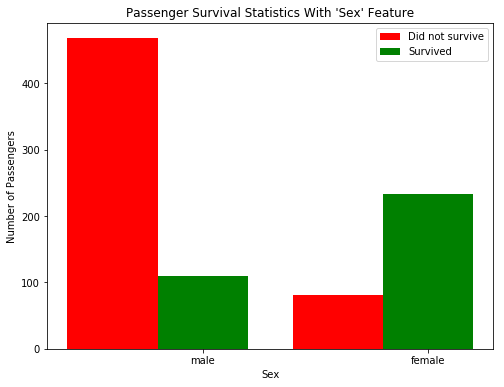

In [17]:
vs.survival_stats(data, outcomes, 'Sex')

A large majority of males did not survive the ship sinking.
<br>However, a majority of females did survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.

**Q2:** How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?

In [18]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            
            predictions.append(1)
        else:
            predictions.append(0)
            
 # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 78.68%.


In this case, the predictions have an accuracy of **78.68%**.

**2. Plot the survival outcomes of male passengers based on their age.**

Using just the Sex feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin.<br>
Now, let's consider using an additional feature to see if we can further improve our predictions.<br>
For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival?<br>
Let's start by looking at the Age of each male, by again using the survival_stats function.<br>
This time, we'll use a fourth parameter to filter out the data so that only passengers with the Sex 'male' will be included.

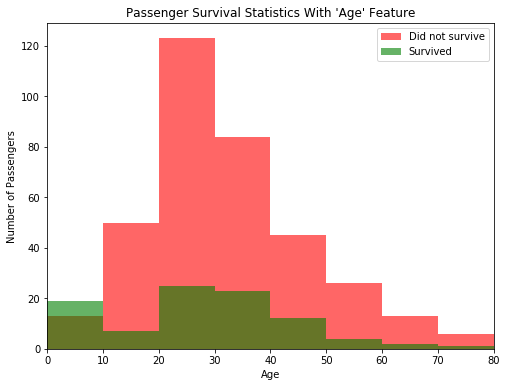

In [19]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

The majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older did not survive the ship sinking.<br>
Let's continue to build on our previous prediction: if a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.

**Q3:** How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

In [20]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """

    predictions = []

    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        
        
        # The prediction of a passenger survived if they are female. 
 
        if passenger['Sex'] == 'female':
            predictions.append(1)
        
        # The prediction of a passenger survived if they are male under 10. 
        elif (passenger['Sex'] == 'male') & (passenger['Age'] < 10):
            predictions.append(1)
            
        else:
            predictions.append(0)

    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 79.35%.


In this case, the predictions have an accuracy of **79.35%**.

**3. Plot the survival outcomes with multiple features and multiple levels of conditional statements.**

Adding the feature Age as a condition in conjunction with Sex improves the accuracy by a small margin more than with simply using the feature Sex alone.<br>
Now, the goal is to find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This require multiple features and multiple levels of conditional statements to succeed. Features that are obviously available: Pclass, Sex, Age, SibSp, and Parch.

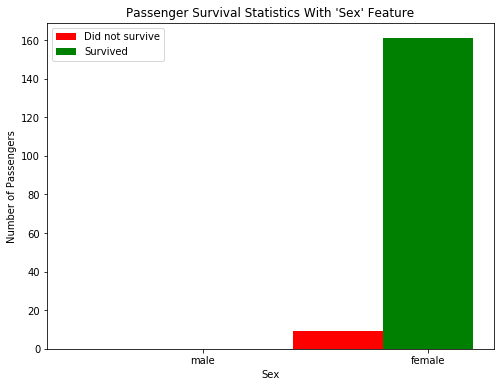

In [23]:
vs.survival_stats(data, outcomes, 'Sex', ["Sex == 'female'", "Pclass < 3"])

In [22]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if (passenger['Sex'] == 'female') & (passenger['Pclass'] < 3):
            predictions.append(1)

        elif (passenger['Sex'] == 'female') & (passenger['Parch'] < 2):
            predictions.append(1)
            
        elif (passenger['Sex'] == 'male') & (passenger['Age'] < 10) & (passenger['SibSp'] < 3):
            predictions.append(1)

        elif (passenger['Sex'] == 'male') & (passenger['Age'] < 16) & (passenger['Pclass'] < 3):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)
print(accuracy_score(outcomes, predictions))

Predictions have an accuracy of 82.38%.


# **Conclusion**

After several iterations of exploring and conditioning on the data, we have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic.<br>
The technique applied in this project is a manual implementation of a simple machine learning model: **the decision tree**.